In [25]:
# read library and model class
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from model import EchoStateNetwork as ESN, functions

In [26]:
# setting matplotlib in notebook
%matplotlib inline
plt.rcParams['font.size'] = 15

In [27]:
# read data
dataframe = pd.read_csv('Chaos.csv', encoding='utf_8', usecols=[0], skiprows=1000, nrows=3000)
dataset = np.array(dataframe.astype('float'))

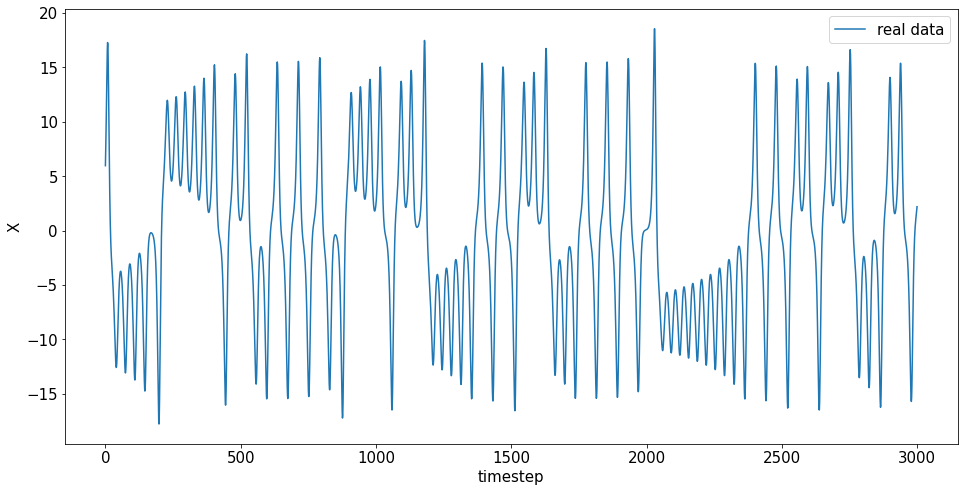

In [28]:
# review data
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.plot(dataset, label="real data")
ax.set_xlabel('timestep')
ax.set_ylabel('X')
ax.legend()

In [29]:
# create dataset
func = functions()
test_size, sample, sparse = 0.5, 3, 5
look_back = (sample-1) * sparse + 1

# input data should make 3d and  shape (length, dimension, lookback)
train = dataset[:int(len(dataset)*test_size), :]
test = dataset[int(len(dataset)*test_size)-look_back:, :]
trainX, trainY = func.create_dataset(train, look_back, sparse, sample)
testX, testY = func.create_dataset(test, look_back, sparse, sample)

print("*"*30)
print("Data Information")
print(f"train data : {train.shape}, test data : {test.shape}")
print(f"input shape : {trainX.shape[2]}, input dimension : {trainX.shape[1]}")
print(f"output shape : {trainY.shape[1]}")
print("*"*30)


******************************
Data Information
train data : (1500, 1), test data : (1511, 1)
input shape : 3, input dimension : 1
output shape : 1
******************************


In [30]:
# define ESN model
model = ESN(units=300,
            SR=0.95,
            input_shape=trainX.shape[2],
            input_dims=trainX.shape[1],
            output_shape=1,
            W_in_scale=0.1,
            W_res_scale=1.0,
            W_res_density=0.1,
            W_fb_scale=0.05,
            leak_rate=1.0,
            alpha=1.0e-4,
            seed=0,
            feedback=False)

print("*"*30)
print("ESN Information")
print(f"Neuron : {model.units}")
print(f"Spectral Radius : {model.SR}")
print(f"W_in Scale : {model.W_in_scale}")
print(f"W_res Scale : {model.W_res_scale}")
print(f"W_res density : {model.W_res_density*100:.1f}%")
if model.feedback==True : print(f"W_fb Scale : {model.W_fb_scale}")
else : print(f"Leaking Rate : {model.leak_rate}")
print(f"L2 norm : {model.alpha}")
print("*"*30)

******************************
ESN Information
Neuron : 300
Spectral Radius : 0.95
W_in Scale : 0.1
W_res Scale : 1.0
W_res density : 10.0%
Leaking Rate : 1.0
L2 norm : 0.0001
******************************


In [31]:
# prediction before trianing and evaluation
train_pred = model.predict(trainX)
train_score = func.rmse(trainY[:,0], train_pred[:,0])
print('train score : %.4f RMSE' %train_score) 

train score : 9.5871 RMSE


In [32]:
# training
model.fit(trainX, trainY)

In [33]:
# 1step prediction and evaluation
test_pred = model.predict(testX)
test_score = func.rmse(testY[:,0], test_pred[:,0])
print('testscore : %.4f RMSE' %test_score) 

testscore : 0.0016 RMSE


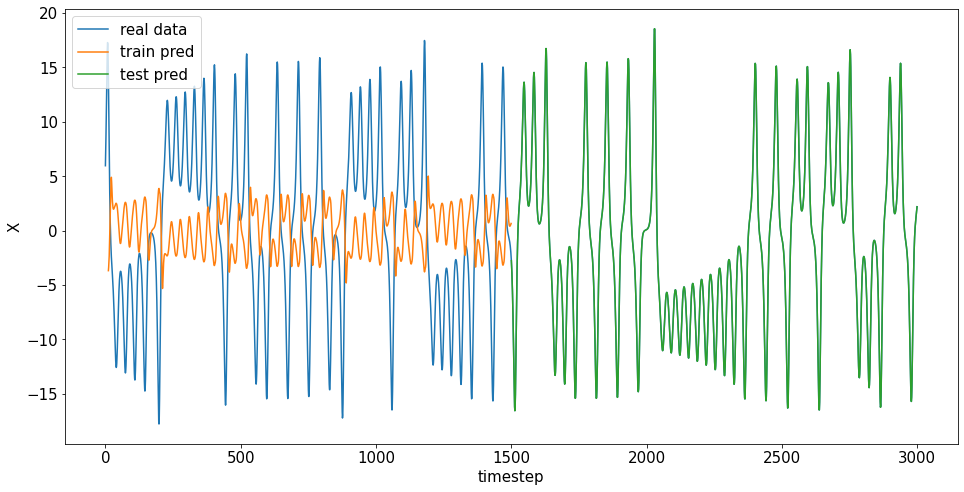

In [34]:
# plot real data and predict data
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.plot(dataframe.iloc[:,0], label='real data')
ax.plot(range(look_back, len(train)), train_pred[:,0], label='train pred')
ax.plot(range(len(train), dataframe.shape[0]), test_pred[:,0], label='test pred')
ax.set_xlabel('timestep')
ax.set_ylabel('X')
ax.legend()

In [35]:
#freerun prediction and evaluation
pred_range = len(testY)
freerun_data = test[:look_back, :]
model.reset_reservoir()
test_pred = model.freerun(freerun_data, sparse, pred_range=pred_range)
test_score = func.rmse(testY[:,0], test_pred[:,0])
print('test score : %.4f RMSE' %test_score)

test score : 8.8196 RMSE


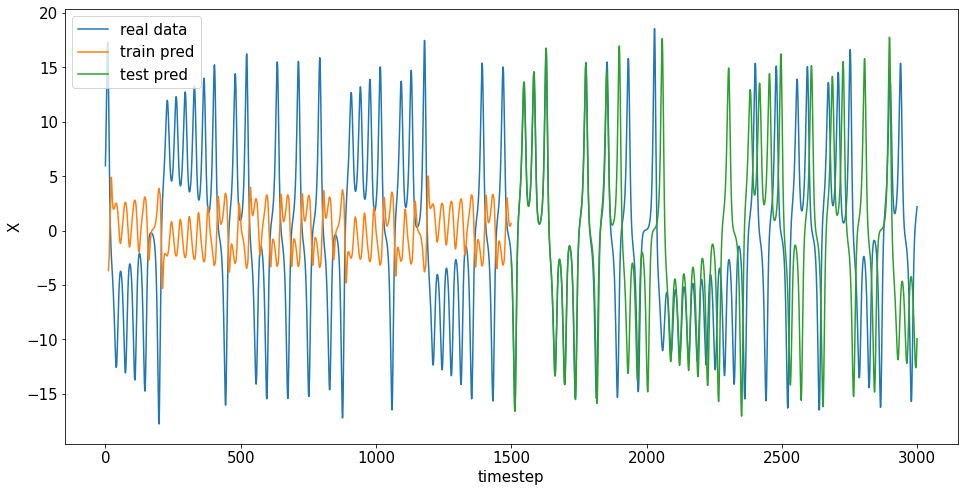

In [36]:
# plot real data and predict data
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.plot(dataframe.iloc[:,0], label='real data')
ax.plot(range(look_back, len(train)), train_pred[:,0], label='train pred')
ax.plot(range(len(train), dataframe.shape[0]), test_pred[:,0], label='test pred')
ax.set_xlabel('timestep')
ax.set_ylabel('X')
ax.legend()